# 1. Import Libraries

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import os

In [191]:
transfer_dataset = "transfer_dataset.csv"
file_exists = os.path.isfile(transfer_dataset)
    
if not file_exists:
    %run "data_mining_transfers.py"    # file doesn't exist yet, data mining .py script executed first

# 2. Import Data

In [176]:
df = pd.read_csv(transfer_dataset, 
                 delimiter = ";") 
df

,season,player_name,age,market_value[EUR],team_left,team_joined,transfer_fee[EUR]
0,14/15,Luis Suarez,27,52000000.0,Liverpool,Barcelona,81720000
1,14/15,James Rodriguez,23,60000000.0,Monaco,Real Madrid,75000000
2,14/15,Angel Di Maria,26,50000000.0,Real Madrid,Man Utd,75000000
3,14/15,David Luiz,27,26000000.0,Chelsea,Paris SG,49500000
4,14/15,Eliaquim Mangala,23,28000000.0,FC Porto,Man City,45000000
...,...,...,...,...,...,...,...
2245,22/23,Cesar Montes,25,7000000.0,Monterrey,Espanyol,8000000
2246,22/23,Alexander Bah,24,7000000.0,Slavia Prague,Benfica,8000000
2247,22/23,El Bilal Toure,20,6500000.0,Stade Reims,UD Almeria,8000000
2248,22/23,Ismael Kone,20,6000000.0,Montreal,Watford,8000000


# 3. Data Overview

In [177]:
for col_idx, col_name in enumerate(df.columns):
    print(f"{str(col_idx + 1).rjust(2)})  {col_name}")

 1)  season
 2)  player_name
 3)  age
 4)  market_value[EUR]
 5)  team_left
 6)  team_joined
 7)  transfer_fee[EUR]


In [178]:
df.dtypes

season                object
player_name           object
age                    int64
market_value[EUR]    float64
team_left             object
team_joined           object
transfer_fee[EUR]      int64
dtype: object

In [179]:
df.isna().any()

season               False
player_name          False
age                  False
market_value[EUR]     True
team_left            False
team_joined          False
transfer_fee[EUR]    False
dtype: bool

# 4. Exploratory Data Analysis

## 4.1. What are the 5 most expensive Transfers per Season

In [180]:
df_expensive = df.copy() 

seasons = list(df_expensive.season.unique())
for season in seasons: 
    top = df_expensive.loc[df_expensive["season"] == season].drop(columns = ["season", "market_value[EUR]"]).sort_values(by = "transfer_fee[EUR]", ascending = False).reset_index(drop = True).iloc[0:5, :]
    top.index = pd.RangeIndex(start=1, stop=6, step=1)
    print(f"\nHere are the 5 most expensive transfers for the season {season}:")
    display(top)


Here are the 5 most expensive transfers for the season 14/15:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Luis Suarez,27,Liverpool,Barcelona,81720000
2,James Rodriguez,23,Monaco,Real Madrid,75000000
3,Angel Di Maria,26,Real Madrid,Man Utd,75000000
4,David Luiz,27,Chelsea,Paris SG,49500000
5,Eliaquim Mangala,23,FC Porto,Man City,45000000



Here are the 5 most expensive transfers for the season 15/16:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Kevin De Bruyne,24,VfL Wolfsburg,Man City,76000000
2,Raheem Sterling,20,Liverpool,Man City,63700000
3,Angel Di Maria,27,Man Utd,Paris SG,63000000
4,Anthony Martial,19,Monaco,Man Utd,60000000
5,Alex Teixeira,26,Shakhtar D.,JS Suning,50000000



Here are the 5 most expensive transfers for the season 16/17:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Paul Pogba,23,Juventus,Man Utd,105000000
2,Gonzalo Higuain,28,SSC Napoli,Juventus,90000000
3,Oscar,25,Chelsea,SH SIPG,60000000
4,Hulk,29,Zenit S-Pb,SH SIPG,56000000
5,John Stones,22,Everton,Man City,55600000



Here are the 5 most expensive transfers for the season 17/18:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Neymar,25,Barcelona,Paris SG,222000000
2,Philippe Coutinho,25,Liverpool,Barcelona,135000000
3,Ousmane Dembele,20,Bor. Dortmund,Barcelona,135000000
4,Romelu Lukaku,24,Everton,Man Utd,84700000
5,Virgil van Dijk,26,Southampton,Liverpool,84650000



Here are the 5 most expensive transfers for the season 18/19:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Kylian Mbappe,19,Monaco,Paris SG,180000000
2,Cristiano Ronaldo,33,Real Madrid,Juventus,117000000
3,Kepa Arrizabalaga,23,Athletic,Chelsea,80000000
4,Thomas Lemar,22,Monaco,Atletico Madrid,72000000
5,Riyad Mahrez,27,Leicester,Man City,67800000



Here are the 5 most expensive transfers for the season 19/20:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Joao Felix,19,Benfica,Atletico Madrid,127200000
2,Antoine Griezmann,28,Atletico Madrid,Barcelona,120000000
3,Eden Hazard,28,Chelsea,Real Madrid,115000000
4,Harry Maguire,26,Leicester,Man Utd,87000000
5,Frenkie de Jong,22,Ajax,Barcelona,86000000



Here are the 5 most expensive transfers for the season 20/21:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Kai Havertz,21,B. Leverkusen,Chelsea,80000000
2,Arthur Melo,24,Barcelona,Juventus,76000000
3,Victor Osimhen,21,LOSC Lille,SSC Napoli,75000000
4,Ruben Dias,23,Benfica,Man City,71600000
5,Miralem Pjanic,30,Juventus,Barcelona,60000000



Here are the 5 most expensive transfers for the season 21/22:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Jack Grealish,25,Aston Villa,Man City,117500000
2,Romelu Lukaku,28,Inter,Chelsea,113000000
3,Jadon Sancho,21,Bor. Dortmund,Man Utd,85000000
4,Dusan Vlahovic,22,Fiorentina,Juventus,81600000
5,Achraf Hakimi,22,Inter,Paris SG,68000000



Here are the 5 most expensive transfers for the season 22/23:


,player_name,age,team_left,team_joined,transfer_fee[EUR]
1,Enzo Fernandez,22,Benfica,Chelsea,121000000
2,Antony,22,Ajax,Man Utd,95000000
3,Wesley Fofana,21,Leicester,Chelsea,80400000
4,Aurelien Tchouameni,22,Monaco,Real Madrid,80000000
5,Darwin Nunez,23,Benfica,Liverpool,80000000


## 4.2. What is the Market Transfer Volume each year?

In [181]:
df_transfer_volume = df.copy()
df_transfer_volume = df_transfer_volume.groupby("season")["transfer_fee[EUR]"].sum().to_frame().reset_index(names = "season")
df_transfer_volume["transfer_fee[EUR]"] = df_transfer_volume["transfer_fee[EUR]"]/1000000000 
df_transfer_volume.rename(columns = {"transfer_fee[EUR]" : "transfer_fee[bn EUR]"}, inplace = True)          

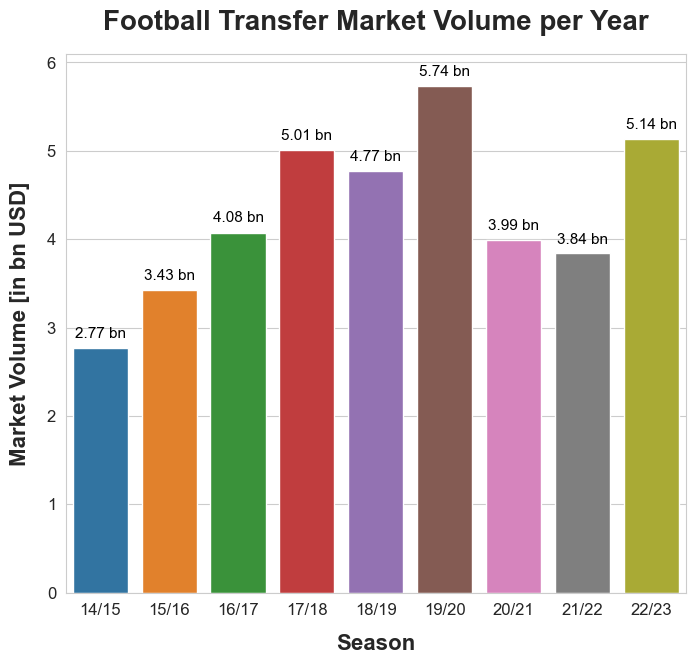

In [182]:
sns.set_style(style = "whitegrid")
fig, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(data = df_transfer_volume,
            x = "season", 
            y = "transfer_fee[bn EUR]")
ax.set_title('Football Transfer Market Volume per Year', fontsize = 20, pad = 17, fontweight = "bold")
ax.set_xlabel('Season', fontsize = 16, labelpad = 12, fontweight = "bold")
ax.set_ylabel('Market Volume [in bn USD]', fontsize = 16, labelpad = 12, fontweight = "bold")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim([0, 6.1])
plt.ticklabel_format(axis = "y", style = "plain")
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.grid(visible = True, alpha = 1, axis = "y")

# adding the annotations to the bars: 
for p in ax.patches:
    width = p.get_width()
    height = np.round(p.get_height(), decimals = 2)
    x, y = p.get_xy() 
    ax.annotate("{:0,.2f} bn".format(height),
            (x + width/2, y + height),
            xytext = (0, 5),
            textcoords = 'offset points',
            ha='center', 
            va = 'bottom',
            rotation = 0, 
            color = 'black',
            fontsize = 11)
plt.show()

We can depict a positive trend of football transfer market volume increase between seasons 14/15 and 19/20. However, the seasons 20/21 and 21/22 are characterized a smaller football transfer market volume compared to the other seasons. This may be explained by the pandemic and wish of the club management to avoid high value transfers in that period. The season 22/23 shows a market recovery and the continuation of the increasing trend.

## 4.3. List the TOP 5 Teams with highest acquisition expenses (in all seasons)

In [183]:
df_team_high_buy_transfer = df.copy()
df_team_high_buy_transfer = df_team_high_buy_transfer.groupby("team_joined")[["player_name", "transfer_fee[EUR]"]].agg({"player_name" : lambda x: list(x), 
                                                                                                                        "transfer_fee[EUR]" : "sum"})
df_team_high_buy_transfer = df_team_high_buy_transfer.reset_index().rename(columns = {"team_joined" : "team",
                                                                                      "player_name" : "list_bought_players",
                                                                                      "transfer_fee[EUR]" : "tot_expenses"}).sort_values(by = "tot_expenses", 
                                                                                                                                         ascending = False)
df_team_high_buy_transfer.head(5).reset_index(drop = True) 

,team,list_bought_players,tot_expenses
0,Chelsea,"[Diego Costa, Cesc Fabregas, Juan Cuadrado, Fi...",1819390000
1,Man Utd,"[Angel Di Maria, Luke Shaw, Ander Herrera, Mar...",1512620000
2,Man City,"[Eliaquim Mangala, Wilfried Bony, Fernando, Wi...",1498099999
3,Barcelona,"[Luis Suarez, Jeremy Mathieu, Thomas Vermaelen...",1464720000
4,Juventus,"[Alvaro Morata, Stefano Sturaro, Luca Marrone,...",1375600000


## 4.4. List the TOP 5 Teams which bought the highest amount of players (in all seasons) 

In [184]:
df_team_high_buy_transfer["nr_bought_players"] = df_team_high_buy_transfer["list_bought_players"].apply(lambda x: len(x))
df_team_high_buy_transfer.sort_values(by = "nr_bought_players", ascending = False)
df_team_high_buy_transfer.head(5).reset_index(drop = True)

,team,list_bought_players,tot_expenses,nr_bought_players
0,Chelsea,"[Diego Costa, Cesc Fabregas, Juan Cuadrado, Fi...",1819390000,47
1,Man Utd,"[Angel Di Maria, Luke Shaw, Ander Herrera, Mar...",1512620000,36
2,Man City,"[Eliaquim Mangala, Wilfried Bony, Fernando, Wi...",1498099999,40
3,Barcelona,"[Luis Suarez, Jeremy Mathieu, Thomas Vermaelen...",1464720000,38
4,Juventus,"[Alvaro Morata, Stefano Sturaro, Luca Marrone,...",1375600000,48


## 4.5. List the TOP 5 Teams with highest acquisition earnings in these seasons

In [185]:
df_team_high_sell_transfer = df.copy()
df_team_high_sell_transfer = df_team_high_sell_transfer.groupby("team_left")[["player_name", "transfer_fee[EUR]"]].agg({"player_name" : lambda x: list(x), 
                                                                                                                        "transfer_fee[EUR]" : "sum"})
df_team_high_sell_transfer = df_team_high_sell_transfer.reset_index().rename(columns = {"team_left" : "team",
                                                                                        "player_name" : "list_sold_players",
                                                                                        "transfer_fee[EUR]" : "tot_earnings"}).sort_values(by = "tot_earnings", 
                                                                                                                                           ascending = False)
df_team_high_sell_transfer.head(5).reset_index(drop = True)

,team,list_sold_players,tot_earnings
0,Monaco,"[James Rodriguez, Radamel Falcao, Emmanuel Riv...",1034420000
1,Benfica,"[Enzo Perez, Lazar Markovic, Jan Oblak, Bernar...",1016790000
2,Chelsea,"[David Luiz, Romelu Lukaku, Andre Schurrle, Ry...",902690000
3,Barcelona,"[Alexis Sanchez, Cesc Fabregas, Pedro, Gerard ...",864450000
4,Juventus,"[Mirko Vucinic, Federico Peluso, Arturo Vidal,...",857339999


## 4.6. List the TOP 5 Teams which sold the highest amount of players in these seasons 

In [186]:
df_team_high_sell_transfer["nr_sold_players"] = df_team_high_sell_transfer["list_sold_players"].apply(lambda x: len(x))
df_team_high_sell_transfer.sort_values(by = "nr_sold_players", ascending = False)
df_team_high_sell_transfer.head(5).reset_index(drop = True)

,team,list_sold_players,tot_earnings,nr_sold_players
0,Monaco,"[James Rodriguez, Radamel Falcao, Emmanuel Riv...",1034420000,30
1,Benfica,"[Enzo Perez, Lazar Markovic, Jan Oblak, Bernar...",1016790000,36
2,Chelsea,"[David Luiz, Romelu Lukaku, Andre Schurrle, Ry...",902690000,39
3,Barcelona,"[Alexis Sanchez, Cesc Fabregas, Pedro, Gerard ...",864450000,31
4,Juventus,"[Mirko Vucinic, Federico Peluso, Arturo Vidal,...",857339999,37


## 4.7. What is the age distribution of the transfered players? 

In [187]:
df.age.describe()

count    2250.000000
mean       23.926222
std         3.249363
min        16.000000
25%        22.000000
50%        24.000000
75%        26.000000
max        36.000000
Name: age, dtype: float64

In [188]:
print(f"The youngest player transfert between seasons 14/15 and 22/23 is {df.age.min()} and his name is {df.loc[df.age.min()].player_name}.")
print(f"The mean age of the players transfered between seasons 14/15 and 22/23 is {round(df.age.mean(), 1)} years.")
print(f"The oldest player transfert between seasons 14/15 and 22/23 is {df.age.max()} and his name is {df.loc[df.age.max()].player_name}.")

The youngest player transfert between seasons 14/15 and 22/23 is 16 and his name is Medhi Benatia.
The mean age of the players transfered between seasons 14/15 and 22/23 is 23.9 years.
The oldest player transfert between seasons 14/15 and 22/23 is 36 and his name is Javi Garcia.


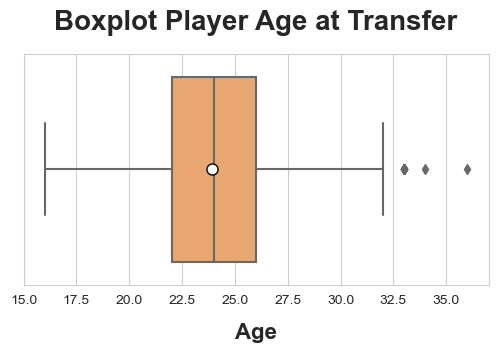

In [189]:
plt.figure(figsize = (6, 3))
sns.boxplot(data = df, 
            x = "age",
            showmeans = True,
            meanprops = {"marker" : "o",
                         "markerfacecolor" : "white", 
                         "markeredgecolor" : "black",
                         "markersize": "8"},
            color = "#fca55d")
plt.title("Boxplot Player Age at Transfer", fontsize = 20, pad = 17, fontweight = "bold")
plt.xlabel("Age", fontsize = 16, labelpad = 12, fontweight = "bold")
plt.show()

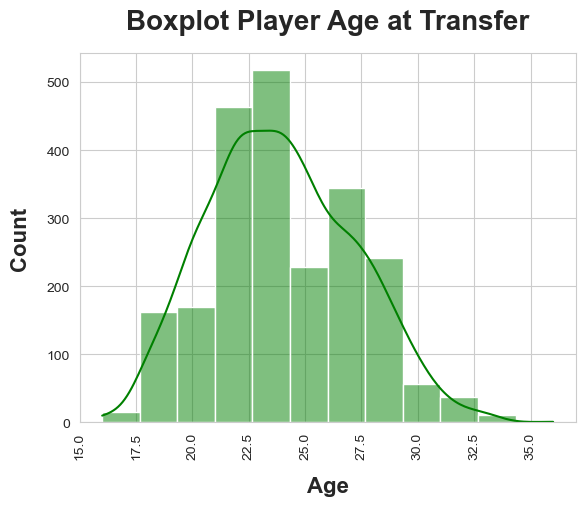

In [190]:
sns.histplot(data = df, 
             x = "age",
             bins = 12,
             stat = "count",
             kde = True, 
             color = "green")
plt.title("Boxplot Player Age at Transfer", fontsize = 20, pad = 17, fontweight = "bold")
plt.xlabel("Age", fontsize = 16, labelpad = 12, fontweight = "bold")
plt.ylabel("Count", fontsize = 16, labelpad = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()